In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='OmerRasheed', api_key='SjLkrkdQEhXLFpcr4a4d')
import plotly.graph_objs as go

In [3]:
data = pd.read_excel("Sample_data.xlsx")
df=data.copy()

# Data Exploration
   Some basic Operations 

In [256]:
df.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_500_750_AMT_T6,RECH_500_750_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
0,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0,0,0,0,0.000,0,0.0,0,45,3
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,0,0,25.523,1,0.0,0,60,4
2,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0,0,0,0,0.000,0,0.0,0,0,0
3,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0,0,0,0,0.000,0,0.0,0,0,0
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0,0,0,0,0.000,0,0.0,0,15,1


In [193]:
df.columns.view

<bound method Index.view of Index(['Customer ID', 'U_OB_VC_CNT_T6', 'U_OB_VC_CC_CNT_T6', 'U_OB_VC_DUR_T6',
       'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_DAY_VC_CC_CNT_T6',
       'U_OB_DAY_VC_DUR_T6', 'U_OB_DAY_VC_REV_T6', 'U_OB_EVN_VC_CNT_T6',
       ...
       'RECH_500_750_AMT_T6', 'RECH_500_750_CNT_T6', 'RECH_GT_1000_AMT_T6',
       'RECH_GT_1000_CNT_T6', 'RECEIVE_AMT_T6', 'RECEIVE_CNT_T6',
       'SHARE_AMT_T6', 'SHARE_CNT_T6', 'LOAN_AMT_T6', 'LOAN_CNT_T6'],
      dtype='object', length=382)>

In [6]:
df.shape

(100, 474)

In [8]:
df.describe()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,U_IB_OFNT_OFFPEAK_SMS_CNT_T6,U_IB_OFNT_H_SMS_CNT_T6,U_IB_OFNT_W_SMS_CNT_T6,U_IB_OFNT_LND_SMS_CNT_T6,U_IB_OFNT_MOBIL_SMS_CNT_T6,U_IB_OFNT_MBLNK_SMS_CNT_T6,U_IB_OFNT_UFN_SMS_CNT_T6,U_IB_OFNT_WRD_SMS_CNT_T6,U_IB_OFNT_ZNG_SMS_CNT_T6,U_IB_OFNT_INT_SMS_CNT_T6
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,50.500000,202.050000,111.830000,691.360000,140.117620,111.620000,69.980000,330.685000,69.930840,73.550000,...,54.110000,25.560000,45.960000,8.170000,70.93000,27.310000,5.610000,6.550000,31.4600,0.090000
std,29.011492,184.225837,97.871804,737.074305,268.021288,108.529173,65.794596,356.864875,124.936672,67.557888,...,193.261057,98.438241,163.640831,9.508162,259.30374,102.457944,20.500256,28.629072,151.2473,0.404395
min,1.000000,2.000000,1.000000,103.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,25.750000,72.000000,38.750000,170.625000,39.804500,34.500000,23.500000,102.625000,19.229250,19.250000,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,50.500000,141.500000,79.500000,404.750000,90.279500,74.500000,45.500000,218.000000,43.145500,52.000000,...,2.000000,1.000000,1.000000,6.000000,2.00000,1.000000,0.000000,0.000000,0.0000,0.000000
75%,75.250000,304.750000,159.750000,928.500000,167.915750,154.500000,98.250000,427.625000,81.055500,114.000000,...,20.750000,10.500000,18.250000,10.000000,29.25000,10.250000,1.000000,0.000000,1.2500,0.000000
max,100.000000,945.000000,400.000000,4049.000000,2570.612000,558.000000,292.000000,2185.000000,1178.275000,311.000000,...,1563.000000,807.000000,1291.000000,56.000000,2075.00000,873.000000,146.000000,221.000000,1092.0000,3.000000


In [9]:
df.reset_index(drop=True, inplace=True)

To find the sum of null values in the following columns

In [10]:
df.isnull().sum()

Customer ID                  0
U_OB_VC_CNT_T6               0
U_OB_VC_CC_CNT_T6            0
U_OB_VC_DUR_T6               0
U_OB_VC_REV_T6               0
U_OB_DAY_VC_CNT_T6           0
U_OB_DAY_VC_CC_CNT_T6        0
U_OB_DAY_VC_DUR_T6           0
U_OB_DAY_VC_REV_T6           0
U_OB_EVN_VC_CNT_T6           0
U_OB_EVN_VC_CC_CNT_T6        0
U_OB_EVN_VC_DUR_T6           0
U_OB_EVN_VC_REV_T6           0
U_OB_NGT_VC_CNT_T6           0
U_OB_NGT_VC_CC_CNT_T6        0
U_OB_NGT_VC_DUR_T6           0
U_OB_NGT_VC_REV_T6           0
U_OB_PEAK_VC_CNT_T6          0
U_OB_PEAK_VC_CC_CNT_T6       0
U_OB_PEAK_VC_DUR_T6          0
U_OB_PEAK_VC_REV_T6          0
U_OB_OFFPEAK_VC_CNT_T6       0
U_OB_OFFPEAK_VC_CC_CNT_T6    0
U_OB_OFFPEAK_VC_DUR_T6       0
U_OB_OFFPEAK_VC_REV_T6       0
U_OB_H_VC_CNT_T6             0
U_OB_H_VC_CC_CNT_T6          0
U_OB_H_VC_DUR_T6             0
U_OB_H_VC_REV_T6             0
U_OB_W_VC_CNT_T6             0
                            ..
RECH_VOUCHER_AMT_T6          0
RECH_VOU

To fill and replace the null values

In [11]:
df.fillna(value=0, inplace=True)
df.replace(np.nan, 0, inplace=True)
df.replace("?", 0, inplace=True)
df.isin(['?']).any()
df = df.fillna(0)

Converting object column data into integer

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')

In [13]:
df.columns.str.contains('VC').sum()

309

# Some exploratory data analysis
Total count of the following services <br>
Voice calls <br>
Internet <br>
Simple text messages

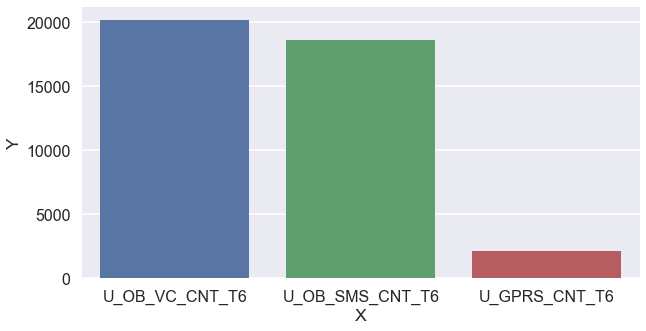

In [104]:
most_cnt = df[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6','U_GPRS_CNT_T6']].sum()
prediction =pd.DataFrame(most_cnt).reset_index()
prediction.columns = ['X', 'Y']

plt.figure(figsize=(10, 5))
sns.barplot(x=prediction.X, y=prediction.Y)

Total revenue generated

([<matplotlib.patches.Wedge at 0x3675f390>,
 [Text(-1.09011,0.147179,'voice calls'),
  Text(1.08417,-0.18597,'text messages'),
  Text(1.0993,-0.0392385,'mobile data')])

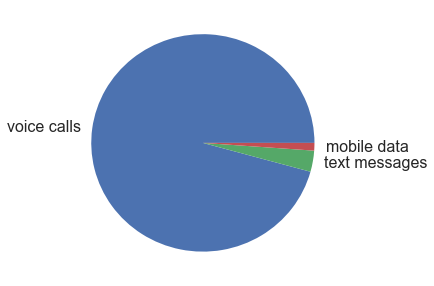

In [130]:
most_cnt = df[['U_OB_VC_REV_T6', 'U_OB_SMS_REV_T6','U_GPRS_REV_T6']].sum()
prediction =pd.DataFrame(most_cnt).reset_index()
prediction.columns = ['X', 'Y']
labels = ['voice calls', 'text messages', 'mobile data']

plt.figure(figsize=(5, 5))
plt.pie(most_cnt,labels=labels)

In [14]:
VC = df[['U_OB_VC_CNT_T6', 'U_OB_VC_REV_T6', 'U_OB_DAY_VC_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6', 'U_OB_PEAK_VC_CNT_T6', 'U_OB_OFFPEAK_VC_CNT_T6']]
VC.head(5)

,U_OB_VC_CNT_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_EVN_VC_CNT_T6,U_OB_NGT_VC_CNT_T6,U_OB_PEAK_VC_CNT_T6,U_OB_OFFPEAK_VC_CNT_T6
0,157,230.070,103,51,3,26,131
1,41,137.276,17,23,1,11,30
2,321,98.422,249,69,3,40,281
3,11,7.587,1,10,0,8,3
4,313,52.915,170,132,11,92,221


In [16]:
print(df["U_OB_VC_CNT_T6"].sum())
print(df["U_OB_VC_REV_T6"].sum())

20205
14011.762000000002


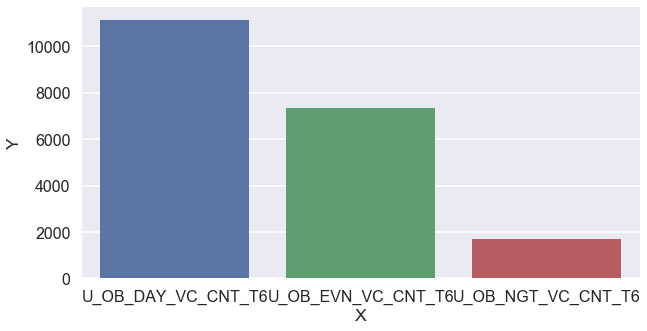

In [106]:
calls = df[['U_OB_DAY_VC_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6']].sum()
prediction =pd.DataFrame(calls).reset_index()
prediction.columns = ['X', 'Y']

plt.figure(figsize=(10, 5))
sns.barplot(x=prediction.X, y=prediction.Y)

In [18]:
vc = df[['U_OB_DAY_VC_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6']].sum()
vc_df = pd.DataFrame(vc).reset_index()
vc_df

,index,0
0,U_OB_DAY_VC_CNT_T6,11162
1,U_OB_EVN_VC_CNT_T6,7355
2,U_OB_NGT_VC_CNT_T6,1688


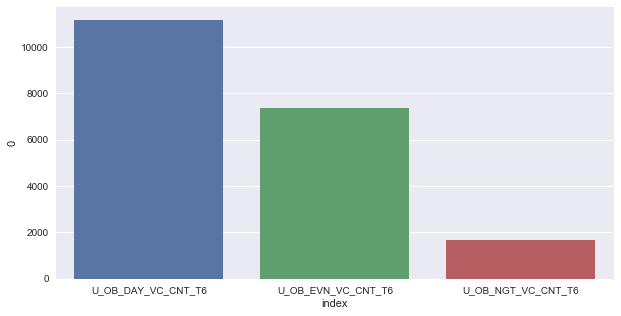

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y=0, data=vc_df);

In [27]:
print("Outbound evening call count",df["U_OB_EVN_VC_CNT_T6"].sum())
print("Outbound Night call count",df["U_OB_NGT_VC_CNT_T6"].sum())
print("Outbound Peak",df["U_OB_PEAK_VC_CNT_T6"].sum())
print("Outbound offPeak",df["U_OB_OFFPEAK_VC_CNT_T6"].sum())

Outbound evening call count 7355
Outbound Night call count 1688
Outbound Peak 3896
Outbound offPeak 16309


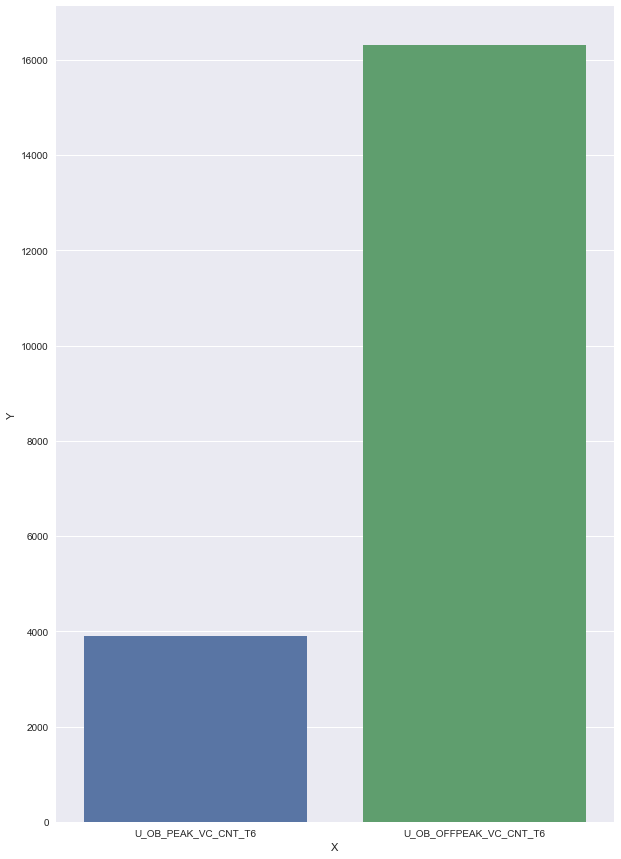

In [28]:
calls = df[['U_OB_PEAK_VC_CNT_T6', 'U_OB_OFFPEAK_VC_CNT_T6']].sum()
prediction =pd.DataFrame(calls).reset_index()
prediction.columns = ['X', 'Y']

plt.figure(figsize=(10, 15))
sns.barplot(x=prediction.X, y=prediction.Y)

SMS Exploration

In [29]:
df.columns.str.contains('SMS').sum()

68

In [30]:
SMS = df[['U_OB_SMS_CNT_T6', 'U_OB_SMS_REV_T6', 'U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_SMS_CNT_T6', 'U_OB_NGT_SMS_CNT_T6']]
SMS.head(5)

,U_OB_SMS_CNT_T6,U_OB_SMS_REV_T6,U_OB_DAY_SMS_CNT_T6,U_OB_EVN_SMS_CNT_T6,U_OB_NGT_SMS_CNT_T6
0,0,0.000,0,0,0
1,586,2.868,312,244,30
2,2,6.931,0,1,1
3,0,0.000,0,0,0
4,189,0.000,83,91,15


In [31]:
df["U_OB_SMS_CNT_T6"].sum()

18587

In [32]:
df["U_OB_SMS_REV_T6"].sum()

459.02700000000004

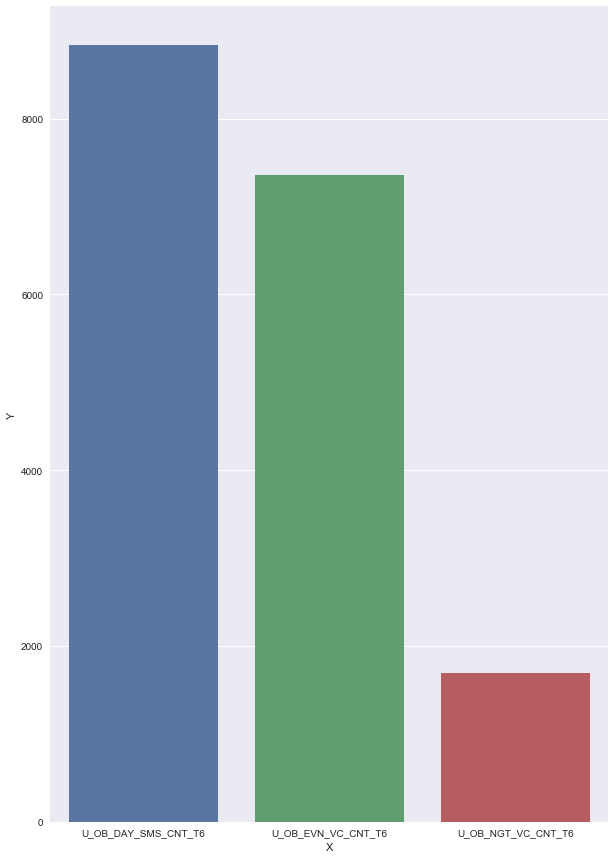

In [33]:
# df["U_OB_DAY_SMS_CNT_T6"].describe()
sms = df[['U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_VC_CNT_T6', 'U_OB_NGT_VC_CNT_T6']].sum()
prediction =pd.DataFrame(sms).reset_index()
prediction.columns = ['X', 'Y']

plt.figure(figsize=(10, 15))
sns.barplot(x=prediction.X, y=prediction.Y)

In [34]:
sms = df[['U_OB_DAY_SMS_CNT_T6', 'U_OB_EVN_SMS_CNT_T6', 'U_OB_NGT_SMS_CNT_T6']].sum()
sms_df = pd.DataFrame(sms).reset_index()
sms_df

,index,0
0,U_OB_DAY_SMS_CNT_T6,8836
1,U_OB_EVN_SMS_CNT_T6,8471
2,U_OB_NGT_SMS_CNT_T6,1280


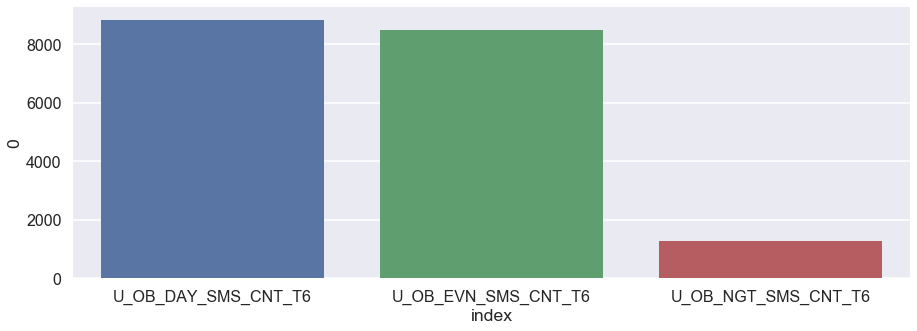

In [136]:
plt.figure(figsize=(15,5))
sns.barplot(x='index', y=0, data=sms_df);

In [37]:
print("Outound evening sms count",df["U_OB_EVN_SMS_CNT_T6"].sum())
print("Outbound night sms count",df["U_OB_NGT_SMS_CNT_T6"].sum())

Outound evening sms count 8471
Outbound night sms count 1280


Data Exploration

In [38]:
df.columns.str.contains('GPRS').sum()

62

In [39]:
GPRS = df[['U_GPRS_CNT_T6', 'U_GPRS_REV_T6', 'U_GPRS_DAY_VOL_T6', 'U_GPRS_EVN_VOL_T6', 'U_GPRS_NGT_VOL_T6']]
GPRS.head(5)

,U_GPRS_CNT_T6,U_GPRS_REV_T6,U_GPRS_DAY_VOL_T6,U_GPRS_EVN_VOL_T6,U_GPRS_NGT_VOL_T6
0,0,0.00,0,0,0
1,26,20.25,489,66,761
2,3,0.00,0,0,61
3,0,0.00,0,0,0
4,0,0.00,0,0,0


In [41]:
print("Data in MB/s count",df["U_GPRS_CNT_T6"].sum())
print("Data volume utilization",df["U_GPRS_VOL_T6"].sum())

Data in MB/s count 2104
Data volume utilization 17349563


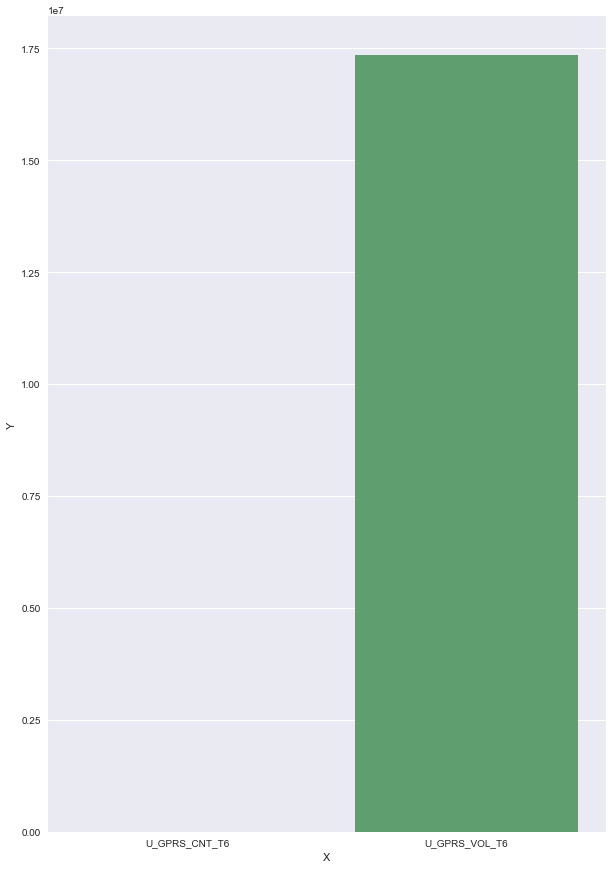

In [42]:
sms = df[['U_GPRS_CNT_T6', 'U_GPRS_VOL_T6']].sum()
prediction =pd.DataFrame(sms).reset_index()
prediction.columns = ['X', 'Y']

plt.figure(figsize=(10, 15))
sns.barplot(x=prediction.X, y=prediction.Y)

In [43]:
gprs = df[['U_GPRS_DAY_VOL_T6', 'U_GPRS_EVN_VOL_T6', 'U_GPRS_NGT_VOL_T6']].sum()
gprs_df = pd.DataFrame(gprs).reset_index()
gprs_df

,index,0
0,U_GPRS_DAY_VOL_T6,9337777
1,U_GPRS_EVN_VOL_T6,4475266
2,U_GPRS_NGT_VOL_T6,3536520


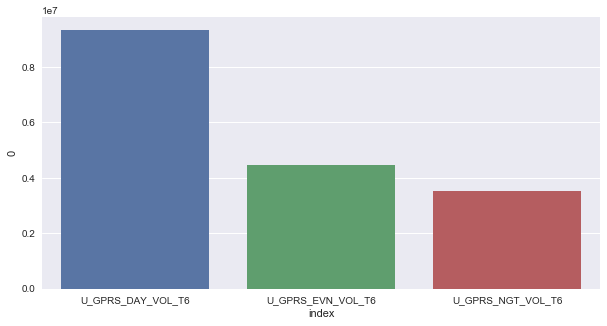

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='index', y=0, data=gprs_df )

Top-up exploration

In [46]:
df.columns.str.contains('RECH').sum()

28

In [47]:
RECH = df[['RECH_CNT_T6', 'RECH_0_50_CNT_T6', 'RECH_50_100_CNT_T6', 'RECH_100_150_CNT_T6', 'RECH_150_200_CNT_T6', 'RECH_300_500_CNT_T6', 'RECH_GT_1000_CNT_T6']]
RECH.head(5)

,RECH_CNT_T6,RECH_0_50_CNT_T6,RECH_50_100_CNT_T6,RECH_100_150_CNT_T6,RECH_150_200_CNT_T6,RECH_300_500_CNT_T6,RECH_GT_1000_CNT_T6
0,6,0,0,6,0,0,0
1,4,0,0,4,0,0,0
2,8,0,0,8,0,0,0
3,3,3,0,0,0,0,0
4,6,0,0,6,0,0,0


In [51]:
print("Rechange Total count:",df['RECH_CNT_T6'].sum())
print("Recharge of 0 to 50:",df['RECH_0_50_CNT_T6'].sum())
print("Recharge of 50 to 100:",df['RECH_50_100_CNT_T6'].sum())
print("Recharge of 100 to 150:",df['RECH_100_150_CNT_T6'].sum())
print("Recharge of 150 to 200:",df['RECH_150_200_CNT_T6'].sum())
print("Recharge of 300 to 500:",df['RECH_300_500_CNT_T6'].sum())
print("Recharge of more or less 1000:",df['RECH_GT_1000_CNT_T6'].sum())


Rechange Total count: 554
Recharge of 0 to 50: 121
Recharge of 50 to 100: 199
Recharge of 100 to 150: 182
Recharge of 150 to 200: 16
Recharge of 300 to 500: 6
Recharge of more or less 1000: 2


In [52]:
rech = df[['RECH_0_50_CNT_T6', 'RECH_50_100_CNT_T6', 'RECH_100_150_CNT_T6', 'RECH_150_200_CNT_T6', 'RECH_300_500_CNT_T6', 'RECH_GT_1000_CNT_T6']].sum()
rech_df = pd.DataFrame(rech).reset_index()
rech_df

,index,0
0,RECH_0_50_CNT_T6,121
1,RECH_50_100_CNT_T6,199
2,RECH_100_150_CNT_T6,182
3,RECH_150_200_CNT_T6,16
4,RECH_300_500_CNT_T6,6
5,RECH_GT_1000_CNT_T6,2


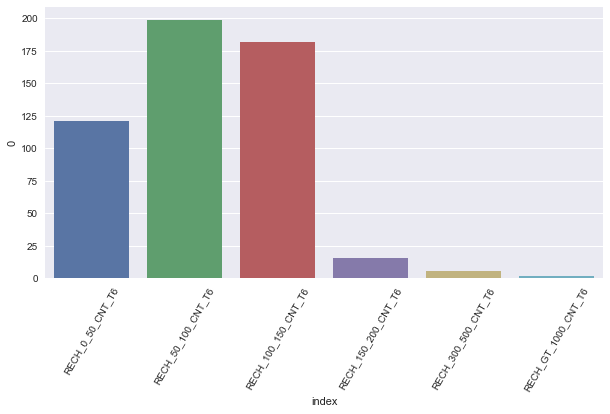

In [53]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.barplot(x='index', y=0, data=rech_df);

# Detecting outliers 
</h1>Calling outlier detection</h1>

In [258]:
np.percentile(df['U_OB_VC_CNT_T6'], [25, 75])

array([ 72.  , 304.75])

In [259]:
vc_q1, vc_q3 = df['U_OB_VC_CNT_T6'].quantile([0.25, 0.75]).values
iqr = vc_q3 - vc_q1
vc_e1 = (vc_q1 - (1.5*iqr))
vc_e2 = (vc_q3 + (1.5*iqr))

In [260]:
vc_e1, vc_e2

(-277.125, 653.875)

SMS outlier detection

In [261]:
np.percentile(df['U_OB_SMS_CNT_T6'], [25, 75])

array([ 0., 23.])

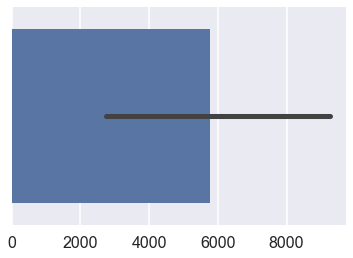

In [262]:
out_vc=df[(df['U_OB_VC_CNT_T6'] < vc_e1) | (df['U_OB_VC_CNT_T6'] > vc_e2)]
sns.barplot(out_vc)

In [263]:
sms_q1, sms_q3 = df['U_OB_SMS_CNT_T6'].quantile([0.25, 0.75]).values
iqr = sms_q3 - sms_q1
sms_e1 = (sms_q1 - (1.5*iqr))
sms_e2 = (sms_q3 + (1.5*iqr))

In [264]:
sms_e1, sms_e2

(-34.5, 57.5)

In [265]:
df[(df['U_OB_SMS_CNT_T6'] < sms_e1) | (df['U_OB_SMS_CNT_T6'] > sms_e2)]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_500_750_AMT_T6,RECH_500_750_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,0,0,25.5230,1,0.0000,0,60,4
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0,0,0,0,0.0000,0,0.0000,0,15,1
7,8,680,398,1450.0,0.000,475,292,818.5,0.000,197,...,0,0,0,0,0.0000,0,18.1825,1,0,0
10,11,203,134,1527.0,121.053,89,71,413.0,96.851,111,...,0,0,0,0,0.0000,0,0.0000,0,90,6
19,20,408,141,1830.0,314.297,142,66,404.0,88.135,208,...,0,0,0,0,0.0000,0,0.0000,0,165,11
25,26,525,255,1465.0,496.929,330,176,975.0,192.538,165,...,0,0,0,0,0.0000,0,0.0000,0,45,3
28,29,44,33,222.0,34.147,41,30,220.0,22.149,2,...,0,0,0,0,21.8528,1,0.0000,0,60,4
30,31,201,119,913.0,117.971,65,44,417.0,42.991,136,...,0,0,0,0,0.0000,0,0.0000,0,120,8
44,45,503,358,1580.0,101.200,227,177,489.0,33.913,217,...,0,0,0,0,0.0000,0,0.0000,0,45,3
46,47,33,11,183.0,26.439,26,6,165.0,13.443,6,...,0,0,0,0,0.0000,0,0.0000,0,30,2


Data outlier detection

In [62]:
np.percentile(df['U_GPRS_VOL_T6'], [25, 75])

array([ 0.  , 46.75])

In [63]:
gprs_q1, gprs_q3 = df['U_GPRS_VOL_T6'].quantile([0.25, 0.75]).values
iqr = gprs_q3 - gprs_q1
gprs_e1 = (gprs_q1 - (1.5*iqr))
gprs_e2 = (gprs_q3 + (1.5*iqr))

In [64]:
gprs_e1, gprs_e2

(-70.125, 116.875)

In [168]:
df[(df['U_GPRS_VOL_T6'] < gprs_e1) | (df['U_GPRS_VOL_T6'] > gprs_e2) ]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_500_750_AMT_T6,RECH_500_750_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,0,0,25.5230,1,0.0000,0,60,4
7,8,680,398,1450.0,0.000,475,292,818.5,0.000,197,...,0,0,0,0,0.0000,0,18.1825,1,0,0
10,11,203,134,1527.0,121.053,89,71,413.0,96.851,111,...,0,0,0,0,0.0000,0,0.0000,0,90,6
12,13,223,157,518.0,9.560,113,81,202.0,0.000,63,...,0,0,0,0,0.0000,0,0.0000,0,0,0
14,15,307,175,610.0,0.000,239,139,424.0,0.000,64,...,0,0,0,0,0.0000,0,0.0000,0,0,0
18,19,116,54,1580.0,89.433,32,24,214.0,34.395,54,...,0,0,0,0,0.0000,0,0.0000,0,105,7
27,28,229,151,498.0,6.000,145,105,296.0,6.000,70,...,0,0,0,0,0.0000,0,0.0000,0,0,0
28,29,44,33,222.0,34.147,41,30,220.0,22.149,2,...,0,0,0,0,21.8528,1,0.0000,0,60,4
36,37,106,61,209.0,12.547,61,39,113.0,5.079,24,...,0,0,0,0,0.0000,0,0.0000,0,15,1
39,40,657,388,868.0,0.000,339,230,450.0,0.000,212,...,0,0,0,0,0.0000,0,0.0000,0,0,0


Recharge Outlier detection

In [66]:
np.percentile(df['RECH_CNT_T6'], [25, 75])

array([2., 8.])

In [67]:
rech_q1, rech_q3 = df['RECH_CNT_T6'].quantile([0.25, 0.75]).values
iqr = rech_q3 - rech_q1
rech_e1 = (rech_q1 - (1.5*iqr))
rech_e2 = (rech_q3 + (1.5*iqr))

In [68]:
rech_e1, rech_e2

(-7.0, 17.0)

In [161]:
df[(df['RECH_CNT_T6'] < rech_e1) | (df['RECH_CNT_T6'] >  rech_e2)]

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_500_750_AMT_T6,RECH_500_750_CNT_T6,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6
42,43,364,173,953.0,303.422,151,96,438.5,125.106,211,...,0,0,0,0,0.0,0,0.0,0,105,7
58,59,665,270,1142.0,2570.612,320,175,516.0,1178.275,247,...,0,0,0,0,0.0,0,0.0,0,120,8


In [70]:
df.shape

(100, 474)

In [71]:
df.fillna(0, inplace=True)

In [72]:
df = df.loc[:,(df!=df.iloc[0]).any()]

In [73]:
df.shape

(100, 382)

# Generating matrix to remove collinearity at a cutoff value of 0.9

In [74]:
corr = df.corr().abs()

In [75]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)) #Generating matrix - Removing collinearity 

In [76]:
to_drop = [column for column in corr.columns if any(corr[column] > 0.95)] #if collinearity is larger than 95%
to_drop

['Customer ID',
 'U_OB_VC_CNT_T6',
 'U_OB_VC_CC_CNT_T6',
 'U_OB_VC_DUR_T6',
 'U_OB_VC_REV_T6',
 'U_OB_DAY_VC_CNT_T6',
 'U_OB_DAY_VC_CC_CNT_T6',
 'U_OB_DAY_VC_DUR_T6',
 'U_OB_DAY_VC_REV_T6',
 'U_OB_EVN_VC_CNT_T6',
 'U_OB_EVN_VC_CC_CNT_T6',
 'U_OB_EVN_VC_DUR_T6',
 'U_OB_EVN_VC_REV_T6',
 'U_OB_NGT_VC_CNT_T6',
 'U_OB_NGT_VC_CC_CNT_T6',
 'U_OB_NGT_VC_DUR_T6',
 'U_OB_NGT_VC_REV_T6',
 'U_OB_PEAK_VC_CNT_T6',
 'U_OB_PEAK_VC_CC_CNT_T6',
 'U_OB_PEAK_VC_DUR_T6',
 'U_OB_PEAK_VC_REV_T6',
 'U_OB_OFFPEAK_VC_CNT_T6',
 'U_OB_OFFPEAK_VC_CC_CNT_T6',
 'U_OB_OFFPEAK_VC_DUR_T6',
 'U_OB_OFFPEAK_VC_REV_T6',
 'U_OB_H_VC_CNT_T6',
 'U_OB_H_VC_CC_CNT_T6',
 'U_OB_H_VC_DUR_T6',
 'U_OB_H_VC_REV_T6',
 'U_OB_W_VC_CNT_T6',
 'U_OB_W_VC_CC_CNT_T6',
 'U_OB_W_VC_DUR_T6',
 'U_OB_W_VC_REV_T6',
 'U_OB_PAID_VC_CNT_T6',
 'U_OB_PAID_VC_CC_CNT_T6',
 'U_OB_PAID_VC_DUR_T6',
 'U_OB_PAID_VC_REV_T6',
 'U_OB_FREE_VC_CNT_T6',
 'U_OB_FREE_VC_CC_CNT_T6',
 'U_OB_FREE_VC_DUR_T6',
 'U_OB_FNF_VC_CNT_T6',
 'U_OB_FNF_VC_CC_CNT_T6',
 'U_OB_FNF_VC

Visualization using pair plot

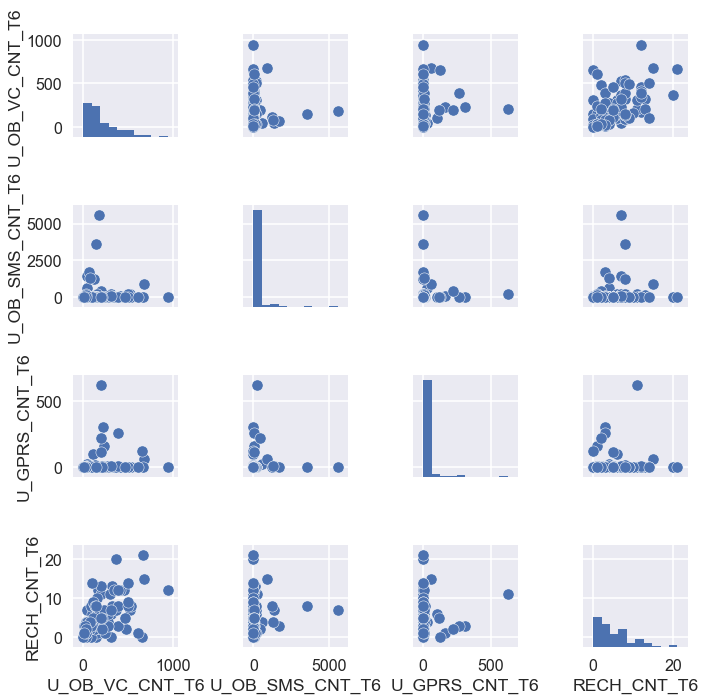

In [266]:
pair_plot=df[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_CNT_T6', 'RECH_CNT_T6']]
sns.pairplot(data=pair_plot)

In [ ]:
sns.set()
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr,annot=True);

Standardization using Min Max Normalization

In [81]:
cols = df[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]

In [82]:
pred = df.copy()

Importing MinMAxScaler package to normalize the sample

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()
new = scaler.fit_transform(cols)

In [85]:
type(new)

numpy.ndarray

In [86]:
scaled = pd.DataFrame(columns=cols.columns, data=new)
scaled.head()

,U_OB_VC_CNT_T6,U_OB_SMS_CNT_T6,U_GPRS_VOL_T6,RECH_CNT_T6
0,0.164369,0.000000,0.000000,0.285714
1,0.041357,0.104718,0.000187,0.190476
2,0.338282,0.000357,0.000009,0.380952
3,0.009544,0.000000,0.000000,0.142857
4,0.329799,0.033774,0.000000,0.285714


In [213]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(scaled)
pred['kmean'] = kmeans.labels_
pred.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6,kmean,kmean2
0,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0,0,0.000,0,0.0,0,45,3,1,0
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,25.523,1,0.0,0,60,4,1,0
2,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0,0,0.000,0,0.0,0,0,0,4,1
3,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0,0,0.000,0,0.0,0,0,0,1,0
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0,0,0.000,0,0.0,0,15,1,4,0


Accuracy of the cluster

In [214]:
metrics.silhouette_score(scaled, kmeans.labels_)

0.48205331409784674

In [215]:
pred['kmean'].value_counts()

1    67
4    15
2    14
3     2
0     2
Name: kmean, dtype: int64

In [216]:
metrics.silhouette_score(scaled, kmeans.labels_)

0.48205331409784674

In [217]:
from scipy.spatial.distance import cdist

In [229]:
cost = []

K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled)
    cost.append(sum(np.min(cdist(scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])

Performing Elbow analysis

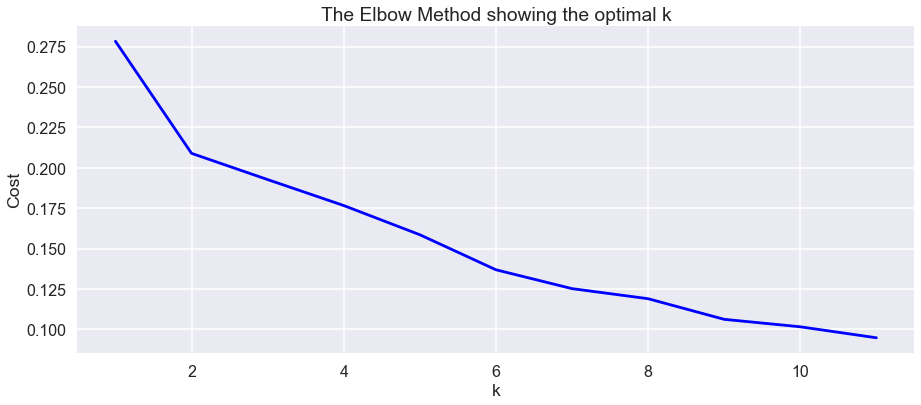

In [230]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Performing Kmeans Clustering

In [221]:
kmeans2 = KMeans(n_clusters=5, random_state=0)
kmeans2.fit(scaled)
pred['kmean2'] = kmeans2.labels_
pred.head()

,Customer ID,U_OB_VC_CNT_T6,U_OB_VC_CC_CNT_T6,U_OB_VC_DUR_T6,U_OB_VC_REV_T6,U_OB_DAY_VC_CNT_T6,U_OB_DAY_VC_CC_CNT_T6,U_OB_DAY_VC_DUR_T6,U_OB_DAY_VC_REV_T6,U_OB_EVN_VC_CNT_T6,...,RECH_GT_1000_AMT_T6,RECH_GT_1000_CNT_T6,RECEIVE_AMT_T6,RECEIVE_CNT_T6,SHARE_AMT_T6,SHARE_CNT_T6,LOAN_AMT_T6,LOAN_CNT_T6,kmean,kmean2
0,1,157,88,379.0,230.070,103,62,207.0,128.794,51,...,0,0,0.000,0,0.0,0,45,3,1,1
1,2,41,38,132.5,137.276,17,14,65.0,77.824,23,...,0,0,25.523,1,0.0,0,60,4,1,1
2,3,321,185,274.5,98.422,249,150,204.0,49.151,69,...,0,0,0.000,0,0.0,0,0,0,4,4
3,4,11,6,172.5,7.587,1,1,2.0,0.149,10,...,0,0,0.000,0,0.0,0,0,0,1,1
4,5,313,220,2888.0,52.915,170,131,791.0,29.699,132,...,0,0,0.000,0,0.0,0,15,1,4,4


In [222]:
pred['kmean2'].value_counts()

1    67
4    15
2    14
3     2
0     2
Name: kmean2, dtype: int64

In [223]:
metrics.silhouette_score(scaled, kmeans.labels_)

0.48205331409784674

Do profiling with clustering and making snake and radar plots

In [224]:
p_ = pred[['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6', 'kmean2']]
pivoted = p_.groupby('kmean2')['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'].mean().reset_index()
pivoted

,kmean2,U_OB_VC_CNT_T6,U_OB_SMS_CNT_T6,U_GPRS_VOL_T6,RECH_CNT_T6
0,0,213.000000,112.000000,6.801142e+06,7.000000
1,1,105.910448,110.119403,3.097769e+04,3.626866
2,2,361.428571,81.000000,3.535714e+01,13.642857
3,3,163.500000,4591.500000,0.000000e+00,7.500000
4,4,486.400000,44.533333,1.114187e+05,6.066667


In [253]:
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 1' ),
    go.Scatterpolar(
      r = list(pivoted.loc[2,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 2'
    ),
     go.Scatterpolar(
      r = list(pivoted.loc[3,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 3'
    ),
     go.Scatterpolar(r = list(pivoted.loc[4,['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6']]),
      theta = ['U_OB_VC_CNT_T6', 'U_OB_SMS_CNT_T6', 'U_GPRS_VOL_T6', 'RECH_CNT_T6'],
      fill = 'tonext',
      fillcolor=None,
      name = 'Cluster 4')
]

In [254]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 200000])), showlegend = True)

In [255]:
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~OmerRasheed/0 or inside your plot.ly account where it is named 'radar'


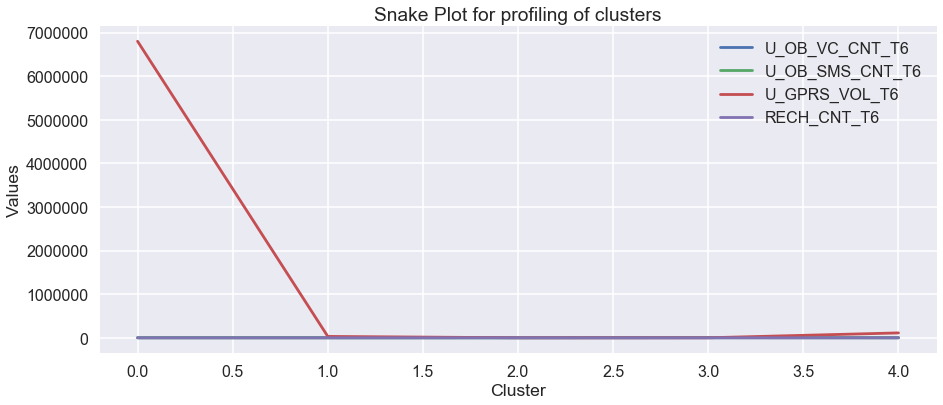

In [252]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pivoted['kmean2'], pivoted['U_OB_VC_CNT_T6']);
plt.plot(pivoted['kmean2'], pivoted['U_OB_SMS_CNT_T6']);
plt.plot(pivoted['kmean2'], pivoted['U_GPRS_VOL_T6']);
plt.plot(pivoted['kmean2'], pivoted['RECH_CNT_T6']);
plt.xlabel('Cluster');
plt.ylabel('Values');
plt.title('Snake Plot for profiling of clusters');
plt.legend();

In [249]:
revenue = df[['U_OB_VC_REV_T6', 'U_OB_SMS_REV_T6', 'U_GPRS_REV_T6']].sum()
revenue_df = pd.DataFrame(revenue).reset_index()
revenue_df

,index,0
0,U_OB_VC_REV_T6,14011.762
1,U_OB_SMS_REV_T6,459.027
2,U_GPRS_REV_T6,166.230
